In [1]:
import numpy as np     #for mathematical calculations
import pandas as pd

# import sklearn packages
import sklearn
from sklearn.impute import SimpleImputer

# for data visualisation
import seaborn as sns

#for plotting graphs
import matplotlib.pyplot as plt

import warnings   #To ignore any warnings
warnings.filterwarnings('ignore')


pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

%matplotlib inline

In [2]:
#load data as dataframe
missing=["No Info","None","none","unknown amount"]
df = pd.read_csv('NewDatav2.csv',na_values=missing)

In [3]:
df.isnull().sum()

Dependent-Company Status                                                                                                               0
year of founding                                                                                                                       0
Age of company in years                                                                                                                0
Internet Activity Score                                                                                                                0
Employee Count                                                                                                                         0
Has the team size grown                                                                                                                0
Est. Founding Date                                                                                                                     0
Last Funding Date                        

In [4]:
#Using a dropper function to find out missing value percentage and droping data with more than 40% missing values
def dropper(dfd):
    i=0
    dfnew=pd.DataFrame()
    print("Columns with more that 40% missing values will be dropped")
    for x in range(dfd.shape[1]):
        per = np.round(float(dfd.isna().sum()[x])/dfd.shape[0],2)*100
        if (per < 40.0):
            dfnew[dfd.columns[x]] = dfd[dfd.columns[x]]
        else:
            print('Removed the Column : {} as the percentage of missing values is {}'.format(dfd.columns[x],per))
            i+=1
    if i==0:
        print("No need to remove any columns as all missing values are less that 40%")
    return dfnew

In [5]:
#Imputation would be performed either though mean or most frequent strategy
numerical_impute = SimpleImputer(strategy='mean')
categorical_impute = SimpleImputer(strategy='most_frequent')

In [6]:
#Here we would be checking the data if it does contain missing values it would be put into pipeline at a later stage
def checker(df):
    if(True in df.isna().any().values):
        print("Missing values exists! Data Cleaning and Imputation of missing values will be performed")
    else:
        print("No missing Values found!")
    return df

In [7]:
#Rounding the float values
def rounder(x):
    return np.round(x,1)

In [8]:
def imputer(df):
    dfd = df.copy()
    print("Imputation Started!")
    if(True in dfd.isna().any().values):
        y=[x for x in dfd.columns if dfd[x].isna().any()]
        z = [x for x in dfd[y].columns if (dfd[y][x].dtypes != 'object')]
        k = [x for x in dfd[y].columns if dfd[y][x].dtypes == 'object']
        print("In progress...")
        if len(z) != 0:
            dfd[z]= numerical_impute.fit_transform(dfd[z])
            dfd[z] = dfd[z].apply(rounder)
        if len(k) != 0:
            dfd[k]= categorical_impute.fit_transform(dfd[k])
        print("Cleaning complete")
    else:
        print("No missing values in the dataset")
    return dfd

In [9]:
#Performing Pipeline All the functions created above would be carried out in a pipeline hence the Pipeline

df.pipe(dropper).pipe(checker).pipe(imputer)

Columns with more that 40% missing values will be dropped
No need to remove any columns as all missing values are less that 40%
Missing values exists! Data Cleaning and Imputation of missing values will be performed
Imputation Started!
In progress...
Cleaning complete


Dependent-Company Status  year of founding  Age of company in years  \
0                           1              2009                        4   
1                           1              2011                        3   
2                           1              2011                        3   
3                           1              2009                        5   
4                           1              2010                        4   
5                           1              2010                        4   
6                           1              2011                        3   
7                           1              2010                        4   
8                           1              2011                        3   
9                           1              2013                        1   
10                          1              2011                        3   
11                          1              2010                        4   
12                          1              2010                        4   
13                          1              2008                        6   
14                          1              2010                        4   
15                          1              2008                        6   
16                          1              2010                        4   
17                          1              2009                        5   
18                          1              2002                       12   
19                          1              2010                        4   
20                          1              2010                        4   
21                          1              2005                        9   
22                          1              2012                        2   
23                          1              2009                        5   
24                          1              2012                        2   
25                          1              2011                        3   
26                          1              2009                        5   
27                          1              2013                        1   
28                          1              2007                        7   
29                          1              2012                        2   
30                          1              2012                        2   
31                          1              2008                        6   
32                          1              2010                        4   
33                          1              2011                        3   
34                          1              2010                        4   
35                          1              2012                        2   
36                          1              2012                        2   
37                          1              2012                        2   
38                          1              2010                        4   
39                          1              2010                        4   
40                          1              2012                        2   
41                          1              2009                        5   
42                          1              2011                        3   
43                          1              2008                        6   
44                          1              2012                        2   
45                          1              2010                        4   
46                          1              2011                        3   
47                          1              2003                       11   
48                          1              2000                       14   
49                          0              2009                        4   
50                          1              2011                        3   
51                          1              2009      

In [10]:
df.replace('unknown amount', np.nan)

Dependent-Company Status  year of founding  Age of company in years  \
0                           1              2009                        4   
1                           1              2011                        3   
2                           1              2011                        3   
3                           1              2009                        5   
4                           1              2010                        4   
5                           1              2010                        4   
6                           1              2011                        3   
7                           1              2010                        4   
8                           1              2011                        3   
9                           1              2013                        1   
10                          1              2011                        3   
11                          1              2010                        4   
12                          1              2010                        4   
13                          1              2008                        6   
14                          1              2010                        4   
15                          1              2008                        6   
16                          1              2010                        4   
17                          1              2009                        5   
18                          1              2002                       12   
19                          1              2010                        4   
20                          1              2010                        4   
21                          1              2005                        9   
22                          1              2012                        2   
23                          1              2009                        5   
24                          1              2012                        2   
25                          1              2011                        3   
26                          1              2009                        5   
27                          1              2013                        1   
28                          1              2007                        7   
29                          1              2012                        2   
30                          1              2012                        2   
31                          1              2008                        6   
32                          1              2010                        4   
33                          1              2011                        3   
34                          1              2010                        4   
35                          1              2012                        2   
36                          1              2012                        2   
37                          1              2012                        2   
38                          1              2010                        4   
39                          1              2010                        4   
40                          1              2012                        2   
41                          1              2009                        5   
42                          1              2011                        3   
43                          1              2008                        6   
44                          1              2012                        2   
45                          1              2010                        4   
46                          1              2011                        3   
47                          1              2003                       11   
48                          1              2000                       14   
49                          0              2009                        4   
50                          1              2011                        3   
51                          1              2009      

In [11]:
df.fillna(df.mean(), inplace = True)

In [12]:
df.isna().sum()

Dependent-Company Status                                                                                                             0
year of founding                                                                                                                     0
Age of company in years                                                                                                              0
Internet Activity Score                                                                                                              0
Employee Count                                                                                                                       0
Has the team size grown                                                                                                              0
Est. Founding Date                                                                                                                   0
Last Funding Date                                      

In [13]:
cat_features = [c for c in df.columns if df[c].dtype in ['object']]
print("Categorical Columns Unique values \n", df[cat_features].nunique())

Categorical Columns Unique values 
 Est. Founding Date                                                                 160
Last Funding Date                                                                  284
Country of company                                                                  22
Continent of company                                                                 4
Number of  Sales Support material                                                    3
Product or service company?                                                          3
Focus on private or public data?                                                     4
Focus on structured or unstructured data                                             4
Cloud or platform based serive/product?                                              3
Linear or Non-linear business model                                                  2
Online or offline venture - physical location based business or online venture?      3
B2C or 

### Delete the columns which contains unique vvalue more than 25
df.drop(['Est. Founding Date',, 'Last Funding Date'], axis=1, inplace=True)
df.dropna(subset=['Price'], axis=0, inplace=True)

# Data Visualization for Analysis 

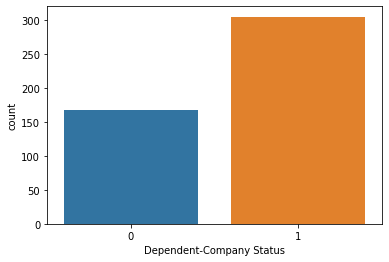

In [14]:
##reference datascience_project_jupyter
sns.countplot(x = df['Dependent-Company Status'])

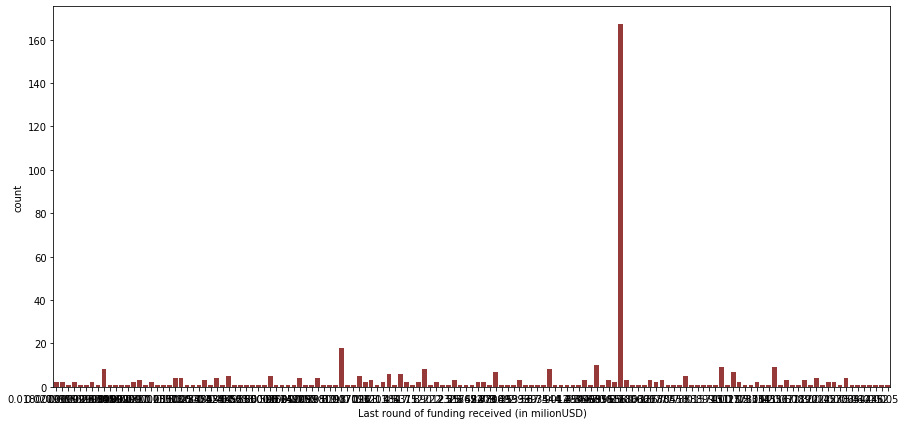

In [15]:
#We can see the values are not distributed properly
plt.figure(figsize=(15,7))
sns.countplot(x= 'Last round of funding received (in milionUSD)', data = df, color = 'brown')